# Project 4: Decision Tree

 **Meenakshi Nerolu**       $\hspace{18cm}$    **December 15, 2019**

# 1. Introduction

A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks. 

There are several advantages of using decision treess for predictive analysis:

* Decision trees can be used to predict both continuous and discrete values i.e. they work well for both  
  regression and classification tasks.
* They require relatively less effort for training the algorithm.
* They can be used to classify non-linearly separable data.
* They are very fast and efficient compared to other classification algorithms.

In this project, we will implement the decision tree algorithm using Python's **Scikit-Learn** library. 

This database is chosen from https://www.kaggle.com/primaryobjects/voicegender#voice.csv. It is created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.

The acoustic properties of the voice and speech can be used to detect gender of speaker. Human has natural capability of identifying the difference but when it comes to computer we need to teach it by providing inputs, methodology or different training data and make it learn. In this project, the focus is on training computer to identify the gender based on input of acoustic attributes using various Machine Learning algorithms and get the best results. The most common means of communication is speech signal. The recorded speech can serve as our input to the system. The system processes this speech signal to get acoustic attributes.

The following acoustic properties of each voice are measured and included within the CSV:

* **meanfreq**: mean frequency (in kHz)
* **sd**: standard deviation of frequency
* **median**: median frequency (in kHz)
* **Q25**: first quantile (in kHz)
* **Q75**: third quantile (in kHz)
* **IQR**: interquantile range (in kHz)
* **skew**: skewness (see note in specprop description)
* **kurt**: kurtosis (see note in specprop description)
* **sp.ent**: spectral entropy
* **sfm**: spectral flatness
* **mode**: mode frequency
* **centroid**: frequency centroid (see specprop)
* **peakf**: peak frequency (frequency with highest energy)
* **meanfun**: average of fundamental frequency measured across acoustic signal
* **minfun**: minimum fundamental frequency measured across acoustic signal
* **maxfun**: maximum fundamental frequency measured across acoustic signal
* **meandom**: average of dominant frequency measured across acoustic signal
* **mindom**: minimum of dominant frequency measured across acoustic signal
* **maxdom**: maximum of dominant frequency measured across acoustic signal
* **dfrange**: range of dominant frequency measured across acoustic signal
* **modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental   frequencies divided by the frequency range
* **label**: male or female


# 2. Prepare and wrangle data with Pandas and Numpy

## Importing all required libraries

In [1]:
# Python Libraries and Packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#data frame from csv file 
voice = pd.read_csv("voice.csv")
print("Dimension of the data set is :", voice.shape)

Dimension of the data set is : (3168, 21)


In [3]:
# Making new data frame with dropped NA values
voice_new=voice.dropna()
# dimension of the new dataframe
print("Dimension of the new data set is :", voice_new.shape)

Dimension of the new data set is : (3168, 21)


In [4]:
voice=voice.rename(columns={"label": "gender"})
voice.head(3)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  gender  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  

[3 rows x 21 columns]

In [5]:
voice.gender[voice.gender == 'male'] = 1
voice.gender[voice.gender == 'female'] = 0 
voice.gender =  voice.gender.astype("float").astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 3. EDA principles and the Matplotlib / Seaborn packages to visualize the data

In [ ]:
!pip install plotly
!pip install cufflinks

In [7]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [ ]:
#voice.iplot(kind='hist')

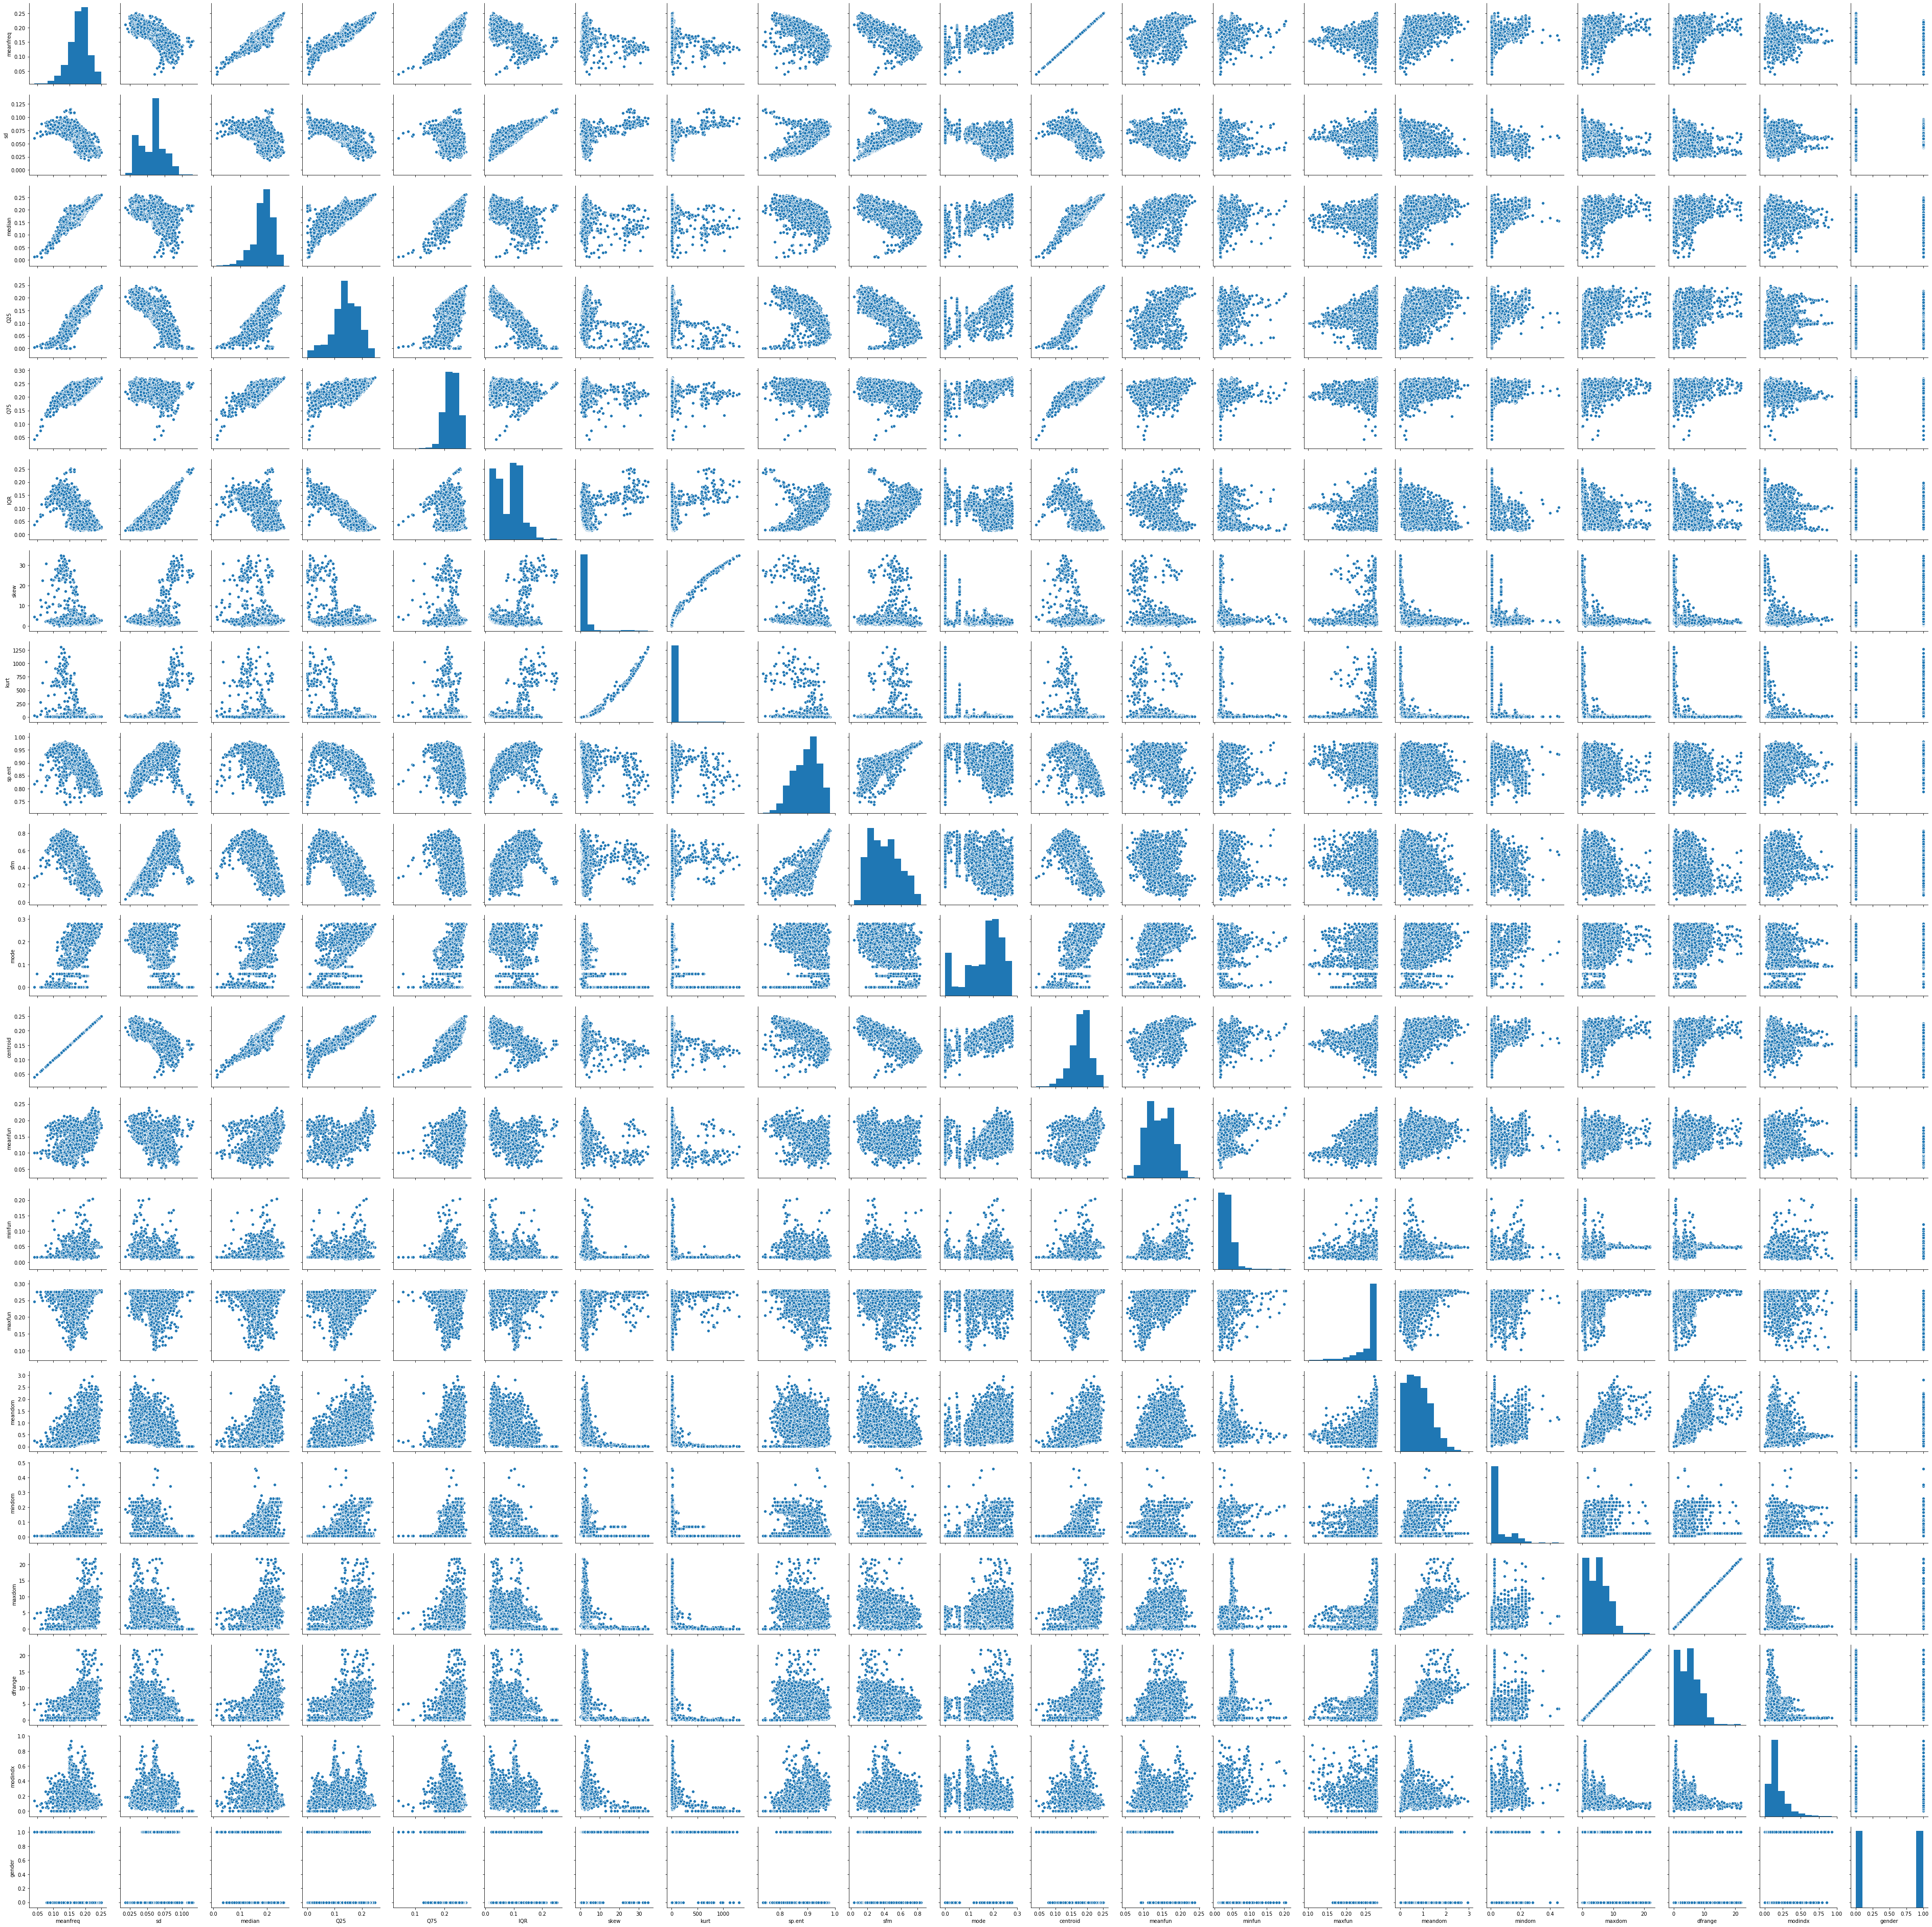

In [8]:
sns.pairplot(voice, kind='scatter')

# 4. DecisionTree using Scikit-learn  

Decision trees are highly interpretable and tend to perform well on classification problems.

In [9]:
import sklearn as sk
from sklearn import metrics 
import sklearn.metrics
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree  

In [10]:
# split dataset in features and target variable
col_names=['gender','meanfun','IQR','Q25','sd','sp.ent']
voice = voice[col_names]
features = np.array(voice.drop(['gender'], 1))
target = np.array(voice['gender'])

#### Splitting Data

Let's split dataset by using function *train_test_split()*.

In [11]:
#Dividing the data randomly into training and test set
X_train, X_test, y_train, y_test = train_test_split(features,target, 
                                                    test_size=0.2,random_state=0)

After splitting the data, 80% data will be used for model training and 20% for model testing.

In [12]:
print ('Shape of X:', features.shape)
print ('Shape of y:', target.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of X: (3168, 5)
Shape of y: (3168,)
Shape of X_train: (2534, 5)
Shape of y_train: (2534,)
Shape of X_test: (634, 5)
Shape of y_test: (634,)


# Model Development and Prediction

## Decision Tree for Classification

Scikit-Learn contains the tree library, which contains built-in classes for various decision tree algorithms. Since we are going to perform a classification task here, we will use the **DecisionTreeClassifier** class for this example. The fit method of this class is called to train the algorithm on the training data, which is passed as parameter to the fit method.

In [13]:
# Instantiate with a max depth of 3
tree_classifier = tree.DecisionTreeClassifier(max_depth=3) 
# Fit a decision tree
tree_classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

To make predictions, the **predict** method of the DecisionTreeClassifier class is used. 

In [14]:
y_pred = tree_classifier.predict(X_test)

### Evaluating the Algorithm

Now we'll see how accurate our algorithm is. For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. Scikit-Learn's metrics library contains the **classification_report** and **confusion_matrix** methods that can be used to calculate these metrics.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[286  15]
 [  6 327]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       301
           1       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



#### Accuracy

In [16]:
# Training accuracy
tree_classifier.score(X_train, y_train)

0.9715864246250987

In [17]:
# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_classifier.predict(X_test))  
probs = pd.DataFrame(tree_classifier.predict_proba(X_test))

In [18]:
# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)  
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
tree_classification_report = metrics.classification_report(y_test, predicted)  
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

In [19]:
# evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), X_test, y_test, scoring='precision', cv=10)

In [ ]:
!pip install graphviz
!pip install pydotplus
!pip install dtreeviz


#!pip install StringIO

In [ ]:
!pip install pydot

In [ ]:
import os
import sys

In [ ]:
os.path

In [ ]:
#def conda_fix(graph):
#    path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
#    paths = ("dot", "twopi", "neato", "circo", "fdp")
#    paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
#    graph.set_graphviz_executables(paths)

#graph = pydotplus.graph_from_dot_data(dot_data)
#conda_fix(graph)

In [ ]:
#def conda_fix(graph):
#    path = "C:\\ProgramData\\Anaconda3\\Lib\\site-packages"
#    tmp = {'dot': path+"dot.exe",
#          'twopi': path+"twopi.exe",
#          'neato': path+"neato.exe",
#          'circo': path+"circo.exe",
#          'fdp': path+"fdp.exe"}
#    graph.set_graphviz_executables(tmp)

#graph = pydotplus.graph_from_dot_data(dot_data)
#conda_fix(graph)

In [ ]:
#os.environ["PATH"] += os.pathsep + 'C:\ProgramData\Anaconda3\Library\bin\graphviz\dot.exe'
os.environ["PATH"] += os.pathsep + "C:\\ProgramData\\Anaconda3\\Lib\\site-packagesdot.exe"

In [ ]:
#Image(graph.create_png())
#graph.write_png('graph.png')

## Decision Tree for Regression

In [20]:
#data frame from csv file 
insurance = pd.read_csv("insurance.csv",index_col=None, na_values=['NA'],sep=',')
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
insurance["smoker_norm"]=map_smoking(insurance["smoker"])
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
insurance["obese"]=map_obese(insurance["bmi"])
insurance.sex[insurance.sex == 'male'] = 0
insurance.sex[insurance.sex == 'female'] = 1
#insurance[insurance.columns]

#list of column names to keep
col_names=['charges','age','children', 'smoker_norm','obese']

#creating new filtered dataframe
new_insurance = insurance[col_names]
#filtering the dataframe to include features and another with target
features = new_insurance.drop('charges', axis=1)
targets = new_insurance['charges']
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 10% of the data,
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(features,targets, 
                                                    test_size=0.2, random_state=9)

The process of solving regression problem with decision tree using Scikit Learn is very similar to that of classification. However for regression we use **DecisionTreeRegressor** class of the tree library. Also the evaluation matrics for regression differ from those of classification.

The dataset we will use for this section is the same that we used in the Linear Regression project.

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train_R, y_train_R)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [46]:
y_pred_regressor = tree_regressor.predict(X_test_R)

In [47]:
df=pd.DataFrame({'Actual':y_test_R, 'Predicted':y_pred_regressor})
df

Actual     Predicted
227   24227.33724  13843.186024
1235   2699.56835   6288.628053
985    7624.63000  10267.037979
326    3561.88890   6288.628053
352    3554.20300   6288.628053
561   10923.93320  13843.186024
543   63770.42801  45308.298618
425    9788.86590  10267.037979
511    2498.41440   6288.628053
131   13616.35860  13843.186024
516   27724.28875   3251.082960
757   23065.42070  24936.277619
771   11150.78000  13843.186024
376   21659.93010  18488.573011
259   33750.29180  38757.355507
937    8965.79575   6288.628053
979    4889.03680   6288.628053
874    8891.13950  10267.037979
59     5989.52365   6288.628053
1231  20167.33603  18488.573011
1068  14349.85440  13843.186024
148   10959.69470  13843.186024
641   32787.45859  24936.277619
1098  23045.56616  13843.186024
592    2566.47070   3251.082960
2      4449.46200   6288.628053
431    4906.40965   6288.628053
831    5266.36560   6288.628053
637   24915.04626   6288.628053
57    34303.16720  38757.355507
...           ...           ...
1048   3594.17085   6288.628053
983   16796.41194   6288.628053
1215  12890.05765   3251.082960
779    9869.81020  13843.186024
925   25333.33284  10267.037979
792    2731.91220   3251.082960
588   13635.63790  13843.186024
356    8944.11510  10267.037979
785    6414.17800   6288.628053
119    6686.43130   6288.628053
1145  11289.10925  13843.186024
1096  44641.19740  45308.298618
258   11520.09985  10267.037979
722   12979.35800  13843.186024
229    9225.25640  10267.037979
1247   6059.17300   6288.628053
64    14711.74380  18488.573011
726    6664.68595   6288.628053
557    3935.17990   6288.628053
426    6555.07035   6288.628053
199   14901.51670  13843.186024
581    1639.56310   3251.082960
971    4992.37640   6288.628053
609   39241.44200  38757.355507
462   15230.32405  13843.186024
81     7935.29115  10267.037979
1152  40941.28540  45308.298618
200    2130.67590   3251.082960
228    7358.17565   6288.628053
422   39125.33225  38757.355507

[268 rows x 2 columns]

To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The Scikit-Learn library contains functions that can help calculate these values for us. To do so, use this code from the metrics package:

In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_R, y_pred_regressor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_R, y_pred_regressor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_R, y_pred_regressor)))

Mean Absolute Error: 2598.9315670764017
Mean Squared Error: 19609099.140934974
Root Mean Squared Error: 4428.216248212701


# 5. Prediction of the classes of the test data and predict the class probability of the test data in the case of classification

In [25]:
#Find the best parameter to prune the tree
def dt_error(n,X_train,y_train,X_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.031545741324921134 occurs at n=7.


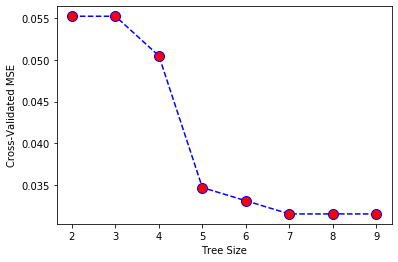

In [26]:
n=dt_error(10,X_train,y_train,X_test,y_test)

In [27]:
print(y_pred[0:10])
print(y_test[0:10])

[0 1 0 0 1 1 0 0 1 0]
[0 1 0 0 1 1 0 0 1 0]


In [28]:
y_prob = tree_classifier.predict_proba(X_test)
y_prob[0:10]

array([[0.99776286, 0.00223714],
       [0.00810811, 0.99189189],
       [0.99776286, 0.00223714],
       [0.99776286, 0.00223714],
       [0.00810811, 0.99189189],
       [0.00810811, 0.99189189],
       [0.93661972, 0.06338028],
       [0.99776286, 0.00223714],
       [0.00810811, 0.99189189],
       [0.99776286, 0.00223714]])

In [ ]:
!pip install scikit-plot

### Lift Curve

The lift curve is an evaluation curve that assesses the performance of your model. It shows how many times more than average the model reaches targets.

To construct this curve, you can use the **plot_lift_curve** method in the scikitplot module and the matplotlib.pyplot module. As for each model evaluation metric or curve, you need the true target values on the one hand and the predictions on the other hand to construct the cumulative gains curve.

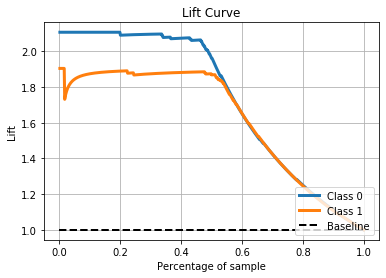

In [29]:
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, y_prob)
plt.show()

# 6. Plot the tree with tree.plot_tree after the training

[Text(167.4, 190.26, 'X[0] <= 0.139\nentropy = 0.5\nsamples = 2534\nvalue = [1283, 1251]'),
 Text(83.7, 135.9, 'X[1] <= 0.074\nentropy = 0.073\nsamples = 1233\nvalue = [47, 1186]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 0.133\nentropy = 0.5\nsamples = 55\nvalue = [28, 27]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.424\nsamples = 36\nvalue = [11, 25]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 0.135\nentropy = 0.032\nsamples = 1178\nvalue = [19, 1159]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.016\nsamples = 1110\nvalue = [9, 1101]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.251\nsamples = 68\nvalue = [10, 58]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.148\nentropy = 0.095\nsamples = 1301\nvalue = [1236, 65]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 0.098\nentropy = 0.464\nsamples = 123\nvalue = [78, 45]'),
 Text(188.32500000000002, 27.18000000000

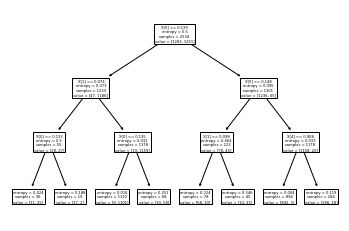

In [30]:
tree.plot_tree(tree_classifier)

In [ ]:
!pip install xgboost

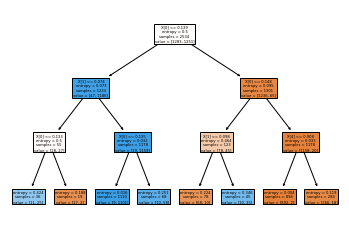

In [31]:
from sklearn.tree import plot_tree
#from xgboost import XGBClassifier
#from xgboost import plot_tree
plot_tree(tree_classifier, filled=True)
plt.show()

### Decision tree for classifier

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(tree_classifier, out_file = 'tree.dot', feature_names = ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent'])

This graph is exported as tree.dot file and we can visualize this by using the link **http://www.webgraphviz.com/**

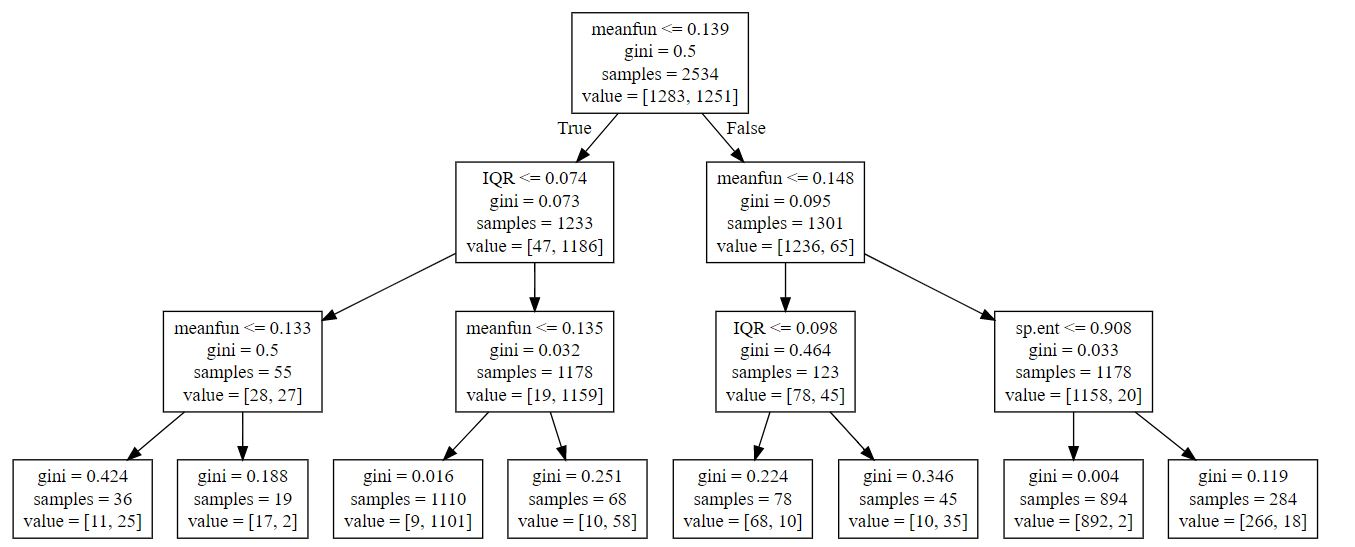

### Decision tree for regression

In [49]:
export_graphviz(tree_regressor, out_file = 'tree1.dot', feature_names = ['age','children', 'smoker_norm','obese'])

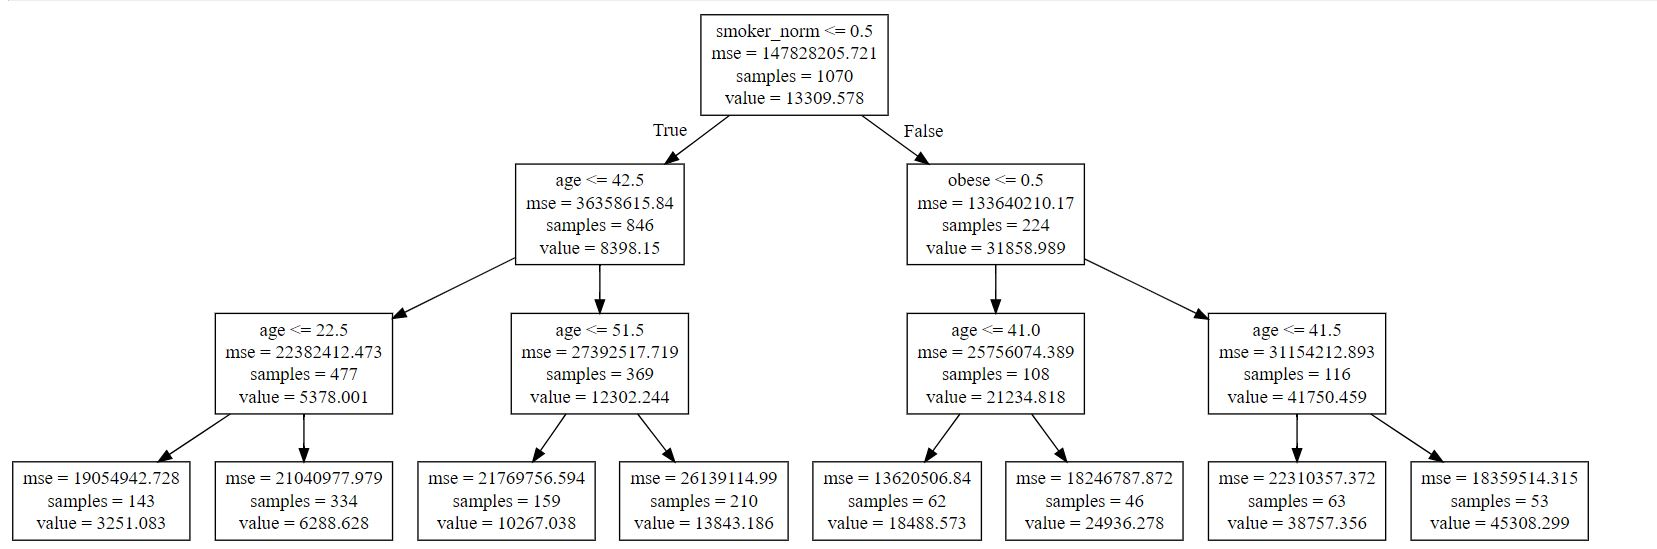

In [41]:
# output decision plot
#import pydot
#import pydotplus
#import graphviz 
#from sklearn.tree import export_graphviz
#from pydotplus import graph_from_dot_data 
#from graphviz import Digraph
#from IPython.display import Image
#dot_data = export_graphviz(tree_classifier, out_file = 'tree.dot', feature_names = ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent'])
#graph = pydotplus.graph_from_dot_data(dot_data)  
#graph = graphviz.Source(dot_data)
#Image(graph.create_jpg())
#graph.write_jpg('graph.jpg')

# 7. Interpretition the result of the algorithm

In [ ]:
#from dtreeviz.trees import *
#from IPython.core.display import display, HTML

#viz = dtreeviz(tree_classifier,
#               X_train,
#               y_train,
#               target_name='gender',
#               feature_names=features, 
               #class_names=["malignant", "benign"],
#               fancy=False) 

#display(HTML(viz.svg()))

In [ ]:
#$ dot -Tpng tree_classifier.dot -o tree_classifier.png 

In [ ]:
#Image(graph.create_png())

### ROC Curve

ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

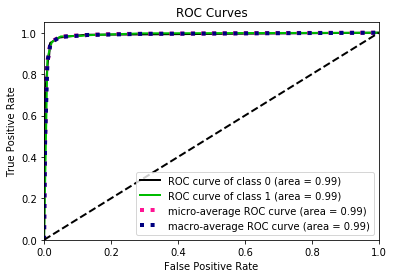

In [50]:
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

### KS Statistic Plot

This is **Kolmogorov-Smirnov test**. It lets us test the hypothesis that the sample is a part of the standard t-distribution.

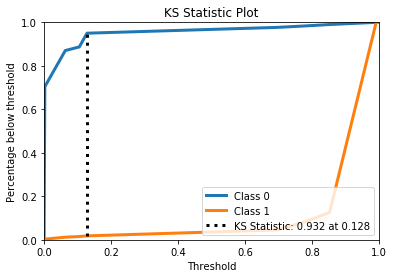

In [51]:
skplt.metrics.plot_ks_statistic(y_test, y_prob)
plt.show()

### Precision recall curve 



The precision and recall can be calculated for thresholds using the precision_recall_curve() function that takes the true output values and the probabilities for the positive class as output and returns the precision, recall and threshold values.

The precision-recall plot is a model-wide evaluation measure that is based on two basic evaluation measures – recall and precision. Recall is a performance measure of the whole positive part of a dataset, whereas precision is a performance measure of positive predictions.

The precision-recall plot uses recall on the x-axis and precision on the y-axis. Recall is identical with sensitivity, and precision is identical with positive predictive value.

In [52]:
#from sklearn.metrics import precision_recall_curve
#precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

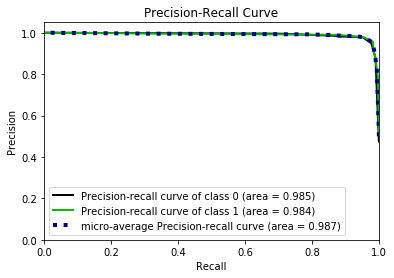

In [53]:
skplt.metrics.plot_precision_recall(y_test, y_prob)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



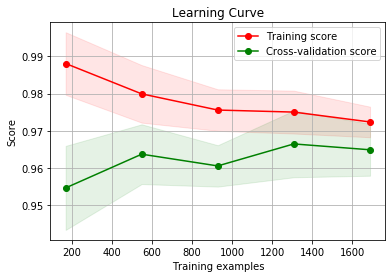

In [54]:
skplt.estimators.plot_learning_curve(tree_classifier, X_train, y_train)
plt.show()

In the graph above, the training score is very high at the beginning and decreases and the cross-validation score is very low at the beginning and increases.


In [ ]:
#!pip install drawtree